In [1]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error

In [2]:
stk_data = yf.download("RELIANCE.NS", start="2021-06-01", end="2022-05-01")
print(stk_data.head())

C:\Users\tiruk\AppData\Local\Temp\ipykernel_19424\1178077750.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  stk_data = yf.download("RELIANCE.NS", start="2021-06-01", end="2022-05-01")
[*********************100%***********************]  1 of 1 completed

Price             Close         High         Low         Open      Volume
Ticker      RELIANCE.NS  RELIANCE.NS RELIANCE.NS  RELIANCE.NS RELIANCE.NS
Date                                                                     
2021-06-01   987.374878  1002.443386  977.177403   986.054647    28013832
2021-06-02  1002.101929  1005.857676  981.957442   981.957442    24630162
2021-06-03  1005.925964  1024.294990  999.757459  1011.092917    23974257
2021-06-04   997.208069  1009.021575  994.362780  1008.270425    14468646
2021-06-07  1014.006470  1020.653023  994.704227  1002.443367    16336573


In [3]:
dataset = pd.read_csv("reliance_data.csv", skiprows=1)
import pandas as pd
# Flatten column MultiIndex if exists
if isinstance(stk_data.columns, pd.MultiIndex):
    stk_data.columns = [col[0] for col in stk_data.columns]

# Check data
print("Data fetched successfully!")
print(stk_data.head())

Data fetched successfully!
                  Close         High         Low         Open    Volume
Date                                                                   
2021-06-01   987.374878  1002.443386  977.177403   986.054647  28013832
2021-06-02  1002.101929  1005.857676  981.957442   981.957442  24630162
2021-06-03  1005.925964  1024.294990  999.757459  1011.092917  23974257
2021-06-04   997.208069  1009.021575  994.362780  1008.270425  14468646
2021-06-07  1014.006470  1020.653023  994.704227  1002.443367  16336573


In [4]:
stk_data=stk_data[["Open","High","Low","Close"]]
stk_data

,Open,High,Low,Close
Date,,,,
2021-06-01,986.054647,1002.443386,977.177403,987.374878
2021-06-02,981.957442,1005.857676,981.957442,1002.101929
2021-06-03,1011.092917,1024.294990,999.757459,1005.925964
2021-06-04,1008.270425,1009.021575,994.362780,997.208069
2021-06-07,1002.443367,1020.653023,994.704227,1014.006470
...,...,...,...,...
2022-04-25,1252.808769,1260.117952,1216.833432,1231.155029
2022-04-26,1238.007307,1276.837847,1236.956647,1267.998169
2022-04-27,1258.952988,1291.913249,1258.587463,1269.231689


In [5]:
train_size = int(len(stk_data) * 0.8)
train = stk_data.iloc[:train_size]
test = stk_data.iloc[train_size:]

In [6]:
model = SimpleExpSmoothing(train['Close'])
model_fit = model.fit()

C:\Anaconda3\envs\dineshML\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [7]:
pred = model_fit.forecast(len(test))

C:\Anaconda3\envs\dineshML\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Anaconda3\envs\dineshML\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [8]:
rmse = mean_squared_error(test['Close'], pred, squared=False)
mape = mean_absolute_percentage_error(test['Close'], pred) * 100
print(f"SES - RMSE: {rmse:.2f}, MAPE: {mape:.2f}%")

SES - RMSE: 88.65, MAPE: 6.22%


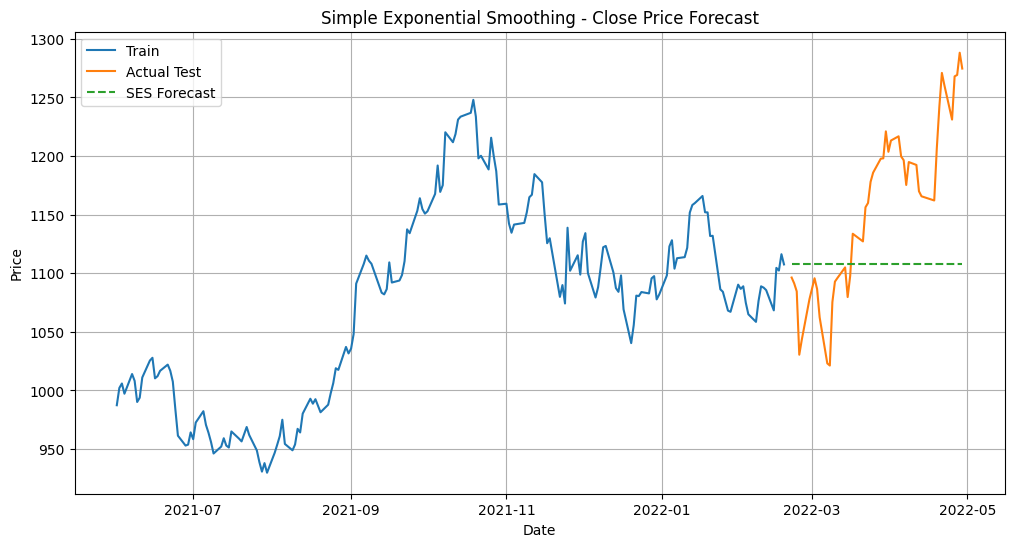

In [9]:

plt.figure(figsize=(12, 6))
plt.plot(train.index, train['Close'], label='Train')
plt.plot(test.index, test['Close'], label='Actual Test')
plt.plot(test.index, pred, label='SES Forecast', linestyle='--')
plt.title("Simple Exponential Smoothing - Close Price Forecast")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.grid(True)
plt.show()
